Introduction

## Getting Started

In [1]:
# Import necessary libraries

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# For preprocession and Feature Engineering
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

# from sklearn.pipeline import make_pipeline
# from pandas_profiling import ProfileReport

# For advanced gradient boosting models
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
sns.set(style='whitegrid')     # Set visual style for seaborn

## Data Loading and Inspection

In [5]:
ls

sample_data/


In [6]:
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/house_prices_data

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/house_prices_data/data_description.txt  
  inflating: /content/house_prices_data/sample_submission.csv  
  inflating: /content/house_prices_data/test.csv  
  inflating: /content/house_prices_data/train.csv  


In [9]:
# Training data
train_df = pd.read_csv('/content/house_prices_data/train.csv')
train_df.drop(train_df.columns[0],axis=1, inplace = True)

# Test data
test_df = pd.read_csv('/content/house_prices_data/test.csv')

In [12]:
# Getting to know the data
print(f"Train Data Shape: {train_df.shape}")
print()

train_df.info()
print()

train_df.head()

Train Data Shape: (1460, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 no

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Training data has 1460 observations and 80 features
- There are various data types, including integers, floats, and objects (strings) across the features.

In [13]:
# Summary statistics
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Displayed descriptive statistics for numerical features

*Interpretation*             
- Count: Most variables have 1460 observations, but some, like LotFrontage (1201) and MasVnrArea (1452), have missing values. I will have to handle missing data before analysis.

- Central Tendency: The mean and median (50%) values for many features are close, indicating relatively symmetric distributions. However, features like LotArea and SalePrice show larger differences between mean and median, suggesting potential skewness.

- Variation:    
  Variables like LotArea (std = 9981) and SalePrice (std = 79442) have high standard deviations relative to their means, indicating substantial variability.    
  Categorical or ordinal variables, such as OverallQual and OverallCond, show smaller standard deviations, reflecting more consistent values.    


In [14]:
#Key Variable Insights
key_var = [
    'SalePrice',        # Target variable
    'YearBuilt',        # Year the house was built
    'YearRemodAdd',     # Year the house was remodeled
    'LotArea',          # Lot area in square feet
    'OverallQual',      # Overall quality rating
    'OverallCond',      # Overall condition rating
    'MasVnrArea'        # Masonry veneer area
]

# Generate summary statistics for selected variables
train_df[key_var].describe()

,SalePrice,YearBuilt,YearRemodAdd,LotArea,OverallQual,OverallCond,MasVnrArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000
mean,180921.195890,1971.267808,1984.865753,10516.828082,6.099315,5.575342,103.685262
std,79442.502883,30.202904,20.645407,9981.264932,1.382997,1.112799,181.066207
min,34900.000000,1872.000000,1950.000000,1300.000000,1.000000,1.000000,0.000000
25%,129975.000000,1954.000000,1967.000000,7553.500000,5.000000,5.000000,0.000000
50%,163000.000000,1973.000000,1994.000000,9478.500000,6.000000,5.000000,0.000000
75%,214000.000000,2000.000000,2004.000000,11601.500000,7.000000,6.000000,166.000000
max,755000.000000,2010.000000,2010.000000,215245.000000,10.000000,9.000000,1600.000000


**Interpretation**

SalePrice:
Mean value of 180,921 usd, medianof 163,000usd and a high standard deviation and maximum value (755,000usd) indicating a right-skewed distribution, likely with some high-value outliers.
Maximum value is over 3 times the 75th percentile (214,000usd), indicating outliers that may need capping or further exploration.

YearBuilt and YearRemodAdd:
Median YearBuilt is 1973, and YearRemodAdd is 1994, showing that many houses have undergone updates. The range of YearBuilt (1872–2010) highlights the dataset's diversity in property age.

LotArea:
Ranges from 1300 to a massive 215,245, with a mean of 10,516. This wide range indicates significant differences in property sizes, likely including outliers. Maximum value (215,245) is far greater than the 75th percentile (11,601), suggesting significant outliers.

Overall Quality and Condition:
OverallQual and OverallCond are ordinal, ranging from 1–10 and 1–9, respectively. Median quality is 6, while condition is 5, suggesting average homes dominate the dataset.

MasVnrArea (Masonry Veneer Area):
Median = 0, indicating that many homes do not have masonry veneer. However, the maximum value of 1600 highlights a few homes with extensive masonry.

## Data Cleaning and Preprocessinbg

**Missing Data**

In [15]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


- Identified columns with significant missing values:
  - PoolQC: 1453 missing
  - MiscFeature: 1406 missing
  - PoolQC: 1453 missing
  - MiscFeature: 1406 missing
  - Alley: 1369 missing
  - Fence: 1179 missing
  - MasVnrType: 872 missing
  - FireplaceQu: 690 missing
  - LotFrontage: 259 missing
- Other columns with fewer missing values.

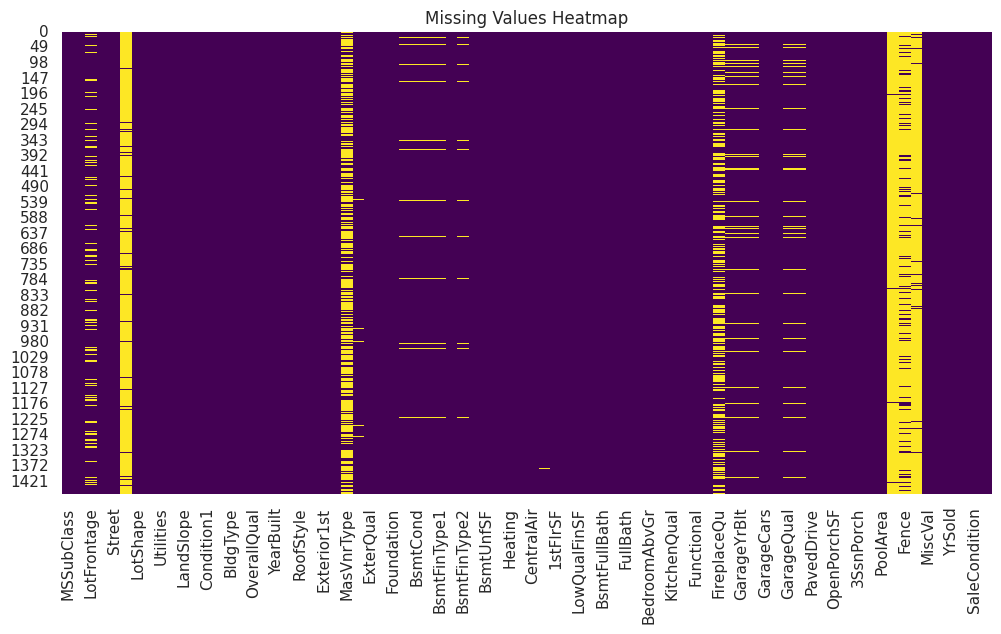

In [16]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [17]:
# Indexing missing values
missing_columns = missing_values[missing_values > 0].index.tolist()

# Display the first few rows of each column with missing values
for column in missing_columns:
    print(f"--- {column} ---")
    print(train_df[column].head(10))
    print()

--- LotFrontage ---
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

--- Alley ---
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Alley, dtype: object

--- MasVnrType ---
0    BrkFace
1        NaN
2    BrkFace
3        NaN
4    BrkFace
5        NaN
6      Stone
7      Stone
8        NaN
9        NaN
Name: MasVnrType, dtype: object

--- MasVnrArea ---
0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64

--- BsmtQual ---
0    Gd
1    Gd
2    Gd
3    TA
4    Gd
5    Gd
6    Ex
7    Gd
8    TA
9    TA
Name: BsmtQual, dtype: object

--- BsmtCond ---
0    TA
1    TA
2    TA
3    Gd
4    TA
5    TA
6    TA
7    TA
8    TA
9    TA
Name: BsmtCond, dtype: object

--- BsmtExposure ---
0    No
1    Gd
2    Mn
3    No
4    Av
5    No
6    Av
7    Mn
8    No
9    No
Name: BsmtE

*cleaning numerical variables*

In [18]:
# Dropping columns with too many missing values
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df.drop(columns=columns_to_drop, inplace=True)

In [19]:
# MasVnrArea - replace with placeholder 0
train_df['MasVnrArea'].head()
train_df.fillna({'MasVnrArea': 0}, inplace=True)  # Replaced with 0

*cleaning categorical variables*

In [20]:
# MasVnrType - replace with none
train_df['MasVnrType'].head()
train_df.fillna({'MasVnrType': 'None'}, inplace=True)

In [21]:
# Fire place - replace with none
train_df['FireplaceQu'].head()
train_df.fillna({'FireplaceQu': 'None'}, inplace=True)

In [22]:
# LotFrontage - replace with median value based on neighborhood
train_df['LotFrontage'].head()
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [23]:
# Garage-related features - replace with none
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']
for feature in garage_features:
    train_df.fillna({feature: 'None'}, inplace=True)

In [24]:
# Basement Features - combine (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) and add none
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train_df[basement_features].head()
for feature in basement_features:
    train_df.fillna({feature: 'None'}, inplace=True)

In [25]:
# Electrical - replace with mode
train_df['Electrical'].head()
mode_value = train_df['Electrical'].mode()[0]
train_df['Electrical'] = train_df['Electrical'].fillna(mode_value)

In [26]:
# Checking for any remaining missing values
remaining_missing_values = train_df.isnull().sum()
print(remaining_missing_values[remaining_missing_values > 0])

Series([], dtype: int64)


There are nomore missing values in the dataframe

In [27]:
# Check what happened to the dataframe
print("Train dataframe after cleaning:", train_df.shape)

Train dataframe after cleaning: (1460, 76)


- Dropped columns with too many missing values.
- Imputed placeholder values for relevant numercial features.
- Imputed placeholder category for relevant categorical features.

In [28]:
# Display head of cleaned data
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Visualizations

**Sale Price**

In [29]:
# Check for non-positive prices
train_df[train_df['SalePrice'] <= 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no rows data with negative price values.

**Sale Price Distribution**

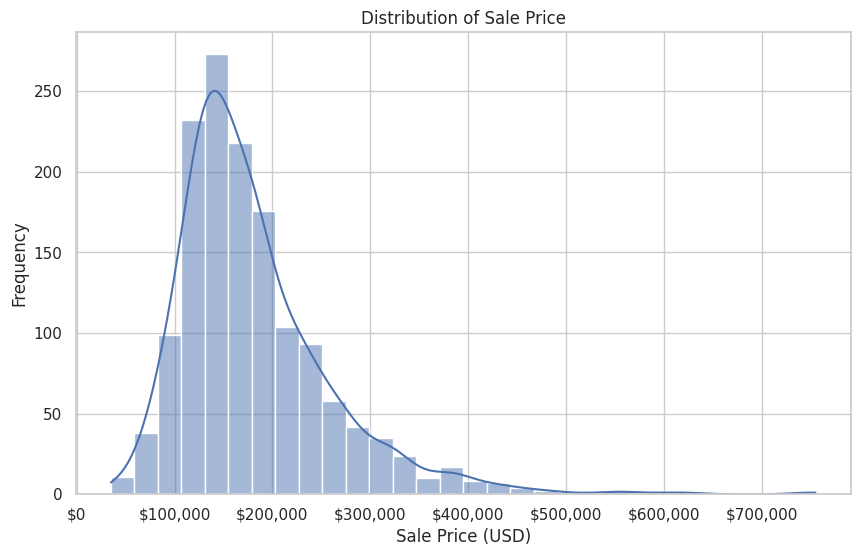

In [31]:
# Plotting Histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**YearBuilt vs SalePrice**

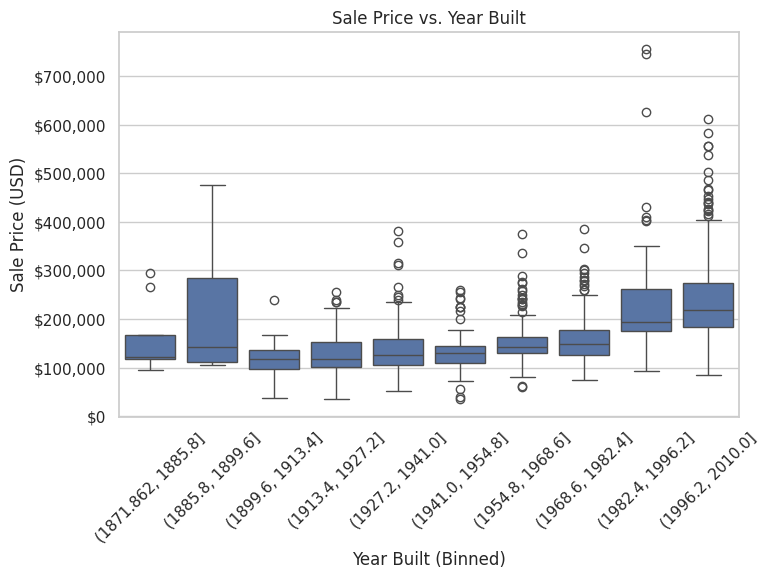

In [32]:
# Plotting Boxplot of SalePrice and YearBuilt
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(train_df['YearBuilt'], bins=10), y=train_df['SalePrice'])
plt.xticks(rotation=45)
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built (Binned)')
plt.ylabel('Sale Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**SalePrice vs. Lot Area**

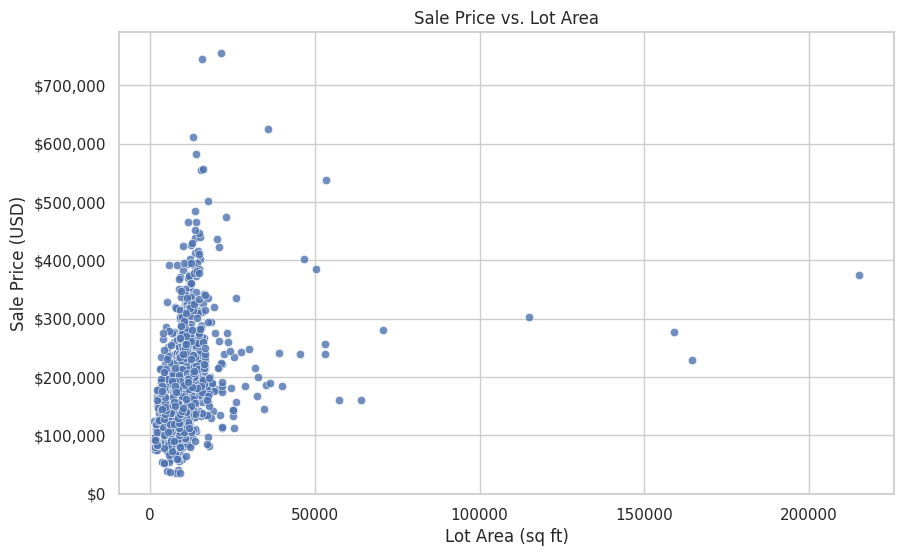

In [35]:
# Plotting Scatterplot of SalePrice and LotArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=train_df, alpha=0.8)
plt.title('Sale Price vs. Lot Area')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**Average Sale Price by Overall Quality**

In [36]:
# Bar plot of Overall Quality by Average Sale Price
avg_price_by_quality = train_df.groupby('OverallQual')['SalePrice'].mean().reset_index()

fig = px.bar(avg_price_by_quality,
              x='OverallQual',
              y='SalePrice',
              title='Average Sale Price by Overall Quality',
              labels={'OverallQual': 'Overall Quality Rating', 'SalePrice': 'Average Sale Price'},
              color='SalePrice',
              color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

**MasVnrArea vs SalePrice**

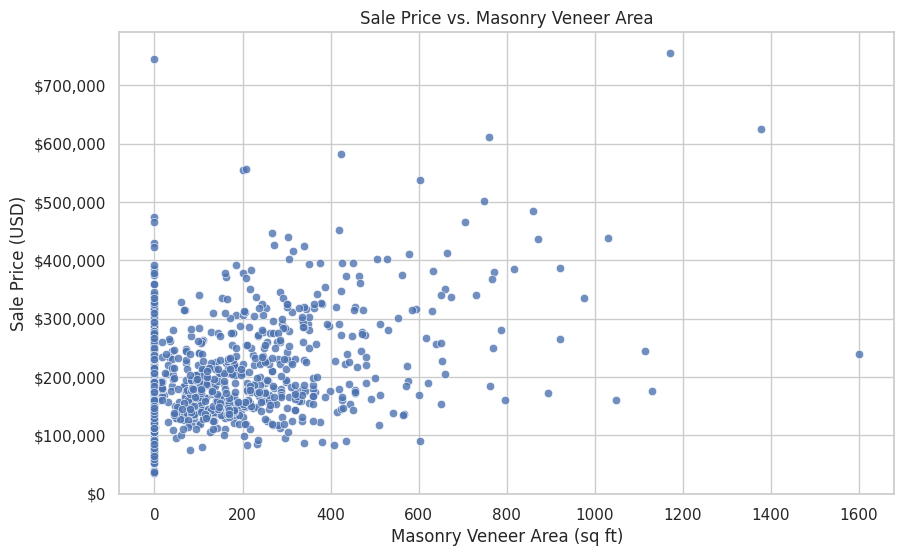

In [38]:
# Scatterplot of Mason Veveer Area and Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=train_df, alpha=0.8)
plt.title('Sale Price vs. Masonry Veneer Area')
plt.xlabel('Masonry Veneer Area (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

<Axes: xlabel='BldgType', ylabel='SalePrice'>

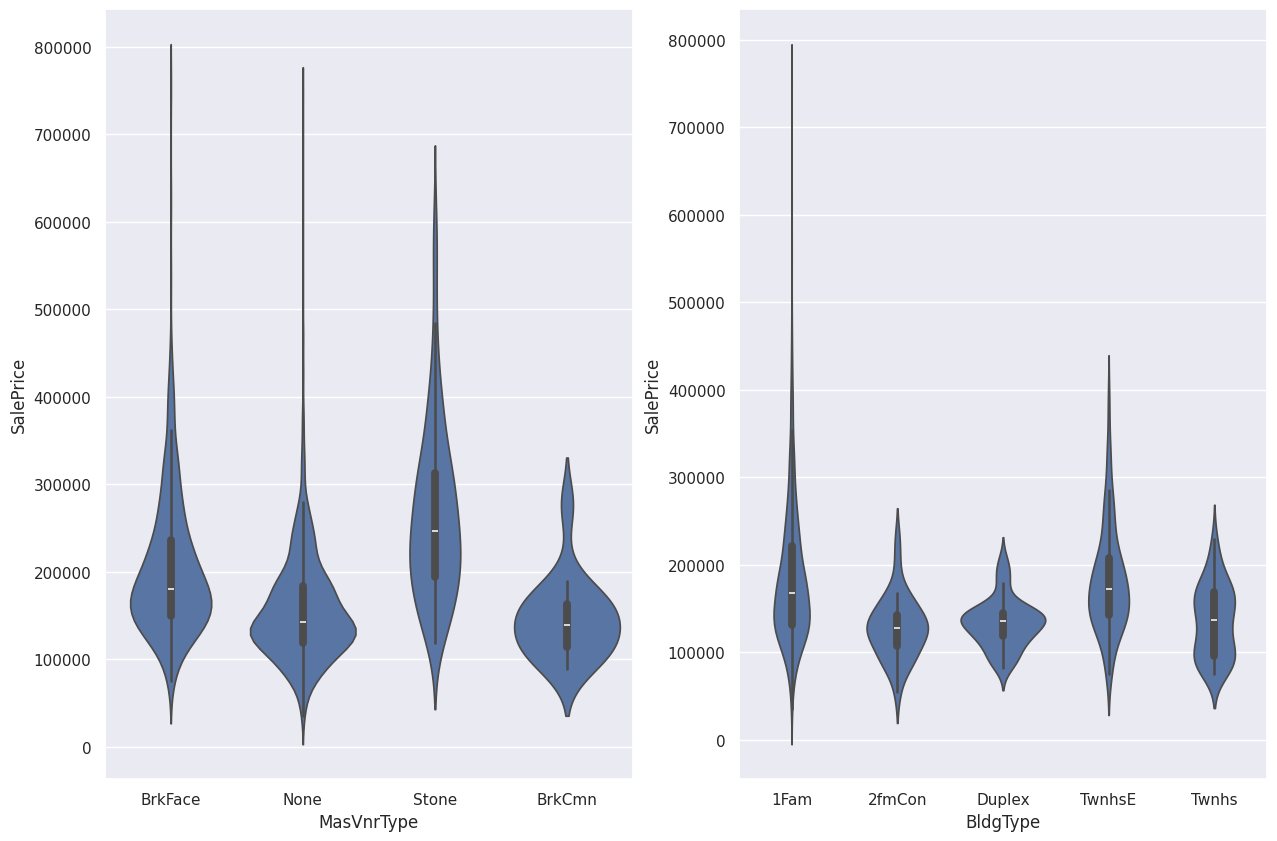

In [39]:
# Violin Plot of BldgType and MasVnrType
sns.set()
sns.set(rc = {'figure.figsize':(15,10)})

fig, axes = plt.subplots(1, 2)

sns.violinplot(data=train_df, x='MasVnrType', y='SalePrice', ax=axes[0])
sns.violinplot(data=train_df, x='BldgType', y='SalePrice', ax=axes[1])

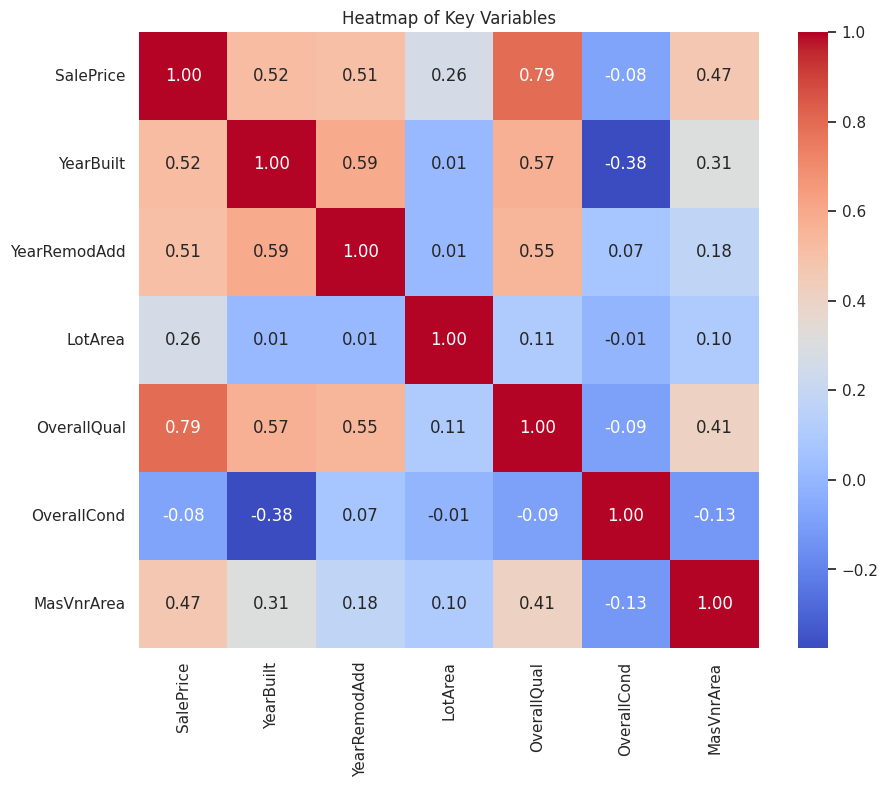

In [40]:
# Heatmap of select key variables
key_features = ['SalePrice', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea']
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[key_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Key Variables')
plt.show()

### Other Interesting Variables

**GrLivArea vs SalePrice**

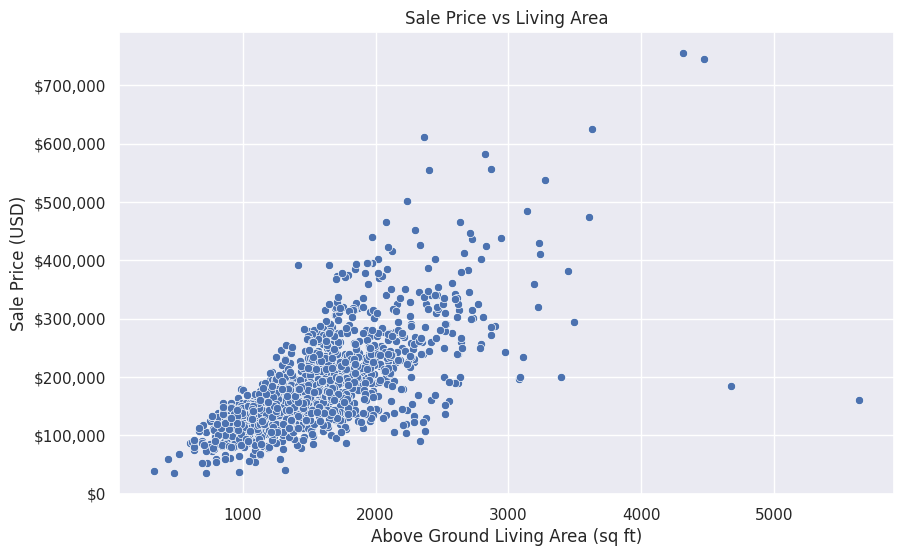

In [41]:
# Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
plt.title('Sale Price vs Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**SalePrice by Neighborhood**

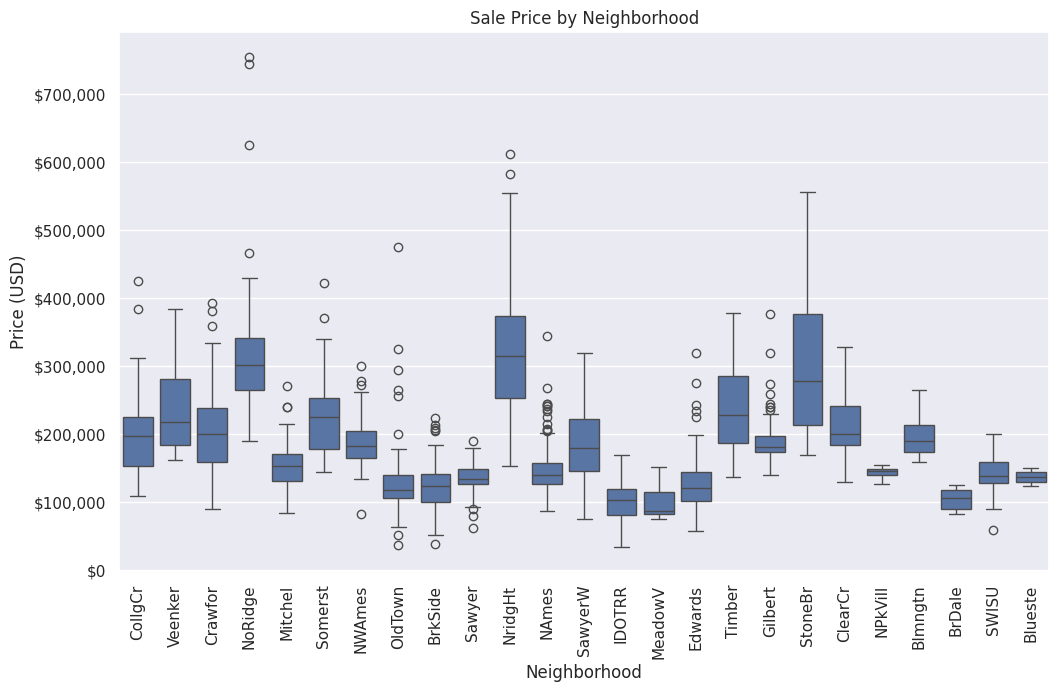

In [42]:
# Box plot of SalePrice by Neighborhood
plt.figure(figsize=(12, 7))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**Categorical Features**

In [44]:
# Display unique value counts for each categorical feature
categorical_features = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle']

for feature in categorical_features:
    print(f"--- {feature} ---")
    print(train_df[feature].value_counts())
    print("\n")

--- MSZoning ---
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


--- Neighborhood ---
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


--- BldgType ---
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


--- HouseStyle ---
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64




**Average Sale Price by MSZoning**

In [51]:
# Counts of each zoning classification
property_counts = train_df['MSZoning'].value_counts().reset_index()
property_counts.columns = ['MSZoning', 'Count']

fig = px.bar(property_counts,
              x='MSZoning',
              y='Count',
              title='Count by Zoning Classification',
              labels={'MSZoning': 'Zoning Classification', 'Count': 'Number of Properties'},
              color='Count',
              color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [45]:
avg_price_by_zoning = train_df.groupby('MSZoning')['SalePrice'].mean().reset_index()

fig = px.bar(avg_price_by_zoning,
              x='MSZoning',
              y='SalePrice',
              title='Average Sale Price by Zoning Classification',
              labels={'MSZoning': 'Zoning Classification', 'SalePrice': 'Average Sale Price'},
              color='SalePrice',
              color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

**Property Types**

In [54]:
ms_subclass_map = {
    20: '1-story 1946+',
    30: '1-story 1945-',
    40: '1-story SF',
    45: '2-story SF',
    50: '2-family',
    60: 'Duplex',
    70: 'Townhouse',
    80: 'SF with garage',
    90: 'Miscellaneous',
}

# Creating a new column for descriptive property types
train_df['PropertyType'] = train_df['MSSubClass'].map(ms_subclass_map)

# Count of each property type
property_counts = train_df['PropertyType'].value_counts().reset_index()
property_counts.columns = ['PropertyType', 'Count']

# Pie chart of property types
fig = go.Figure(data=[go.Pie(labels=property_counts['PropertyType'],
                               values=property_counts['Count'],
                               hole=.4)])  # To create a donut chart

fig.update_layout(title_text='Count by Property Type')
fig.show()

**SalePrice vs PropertyType**

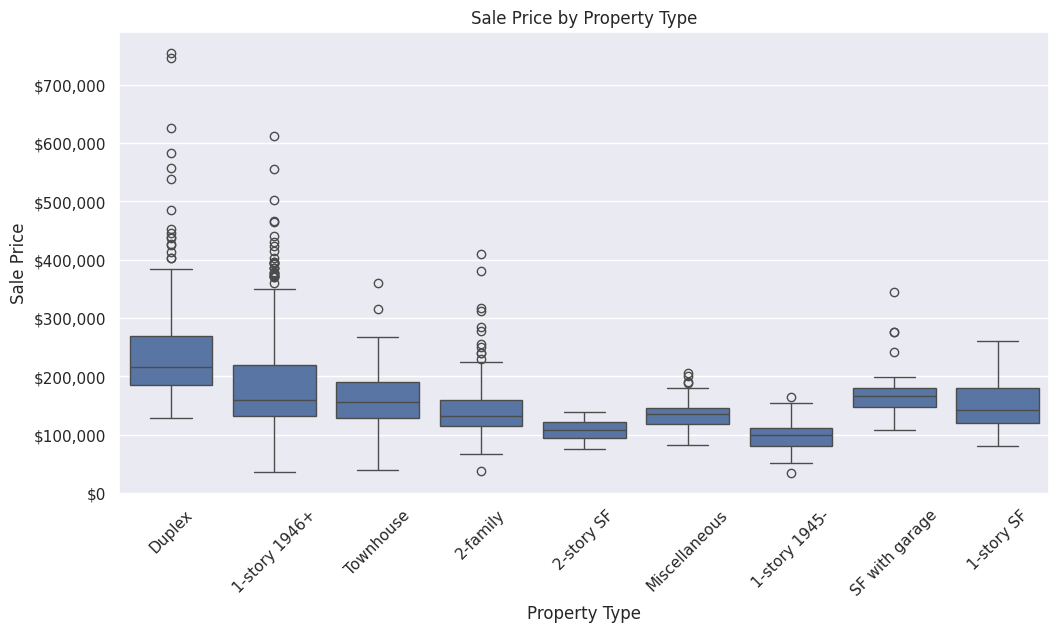

In [56]:
# Box plot of Sale Price by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='PropertyType', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Sale Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

In [59]:
# Bar plot of average sale prices by each property type
avg_price_by_property_type = train_df.groupby('PropertyType')['SalePrice'].mean().reset_index()

fig = px.bar(avg_price_by_property_type,
             x='PropertyType',
             y='SalePrice',
             title='Average Sale Price by Property Type',
             labels={'PropertyType': 'Property Type', 'SalePrice': 'Average Sale Price'},
             color='SalePrice',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [61]:
# Correlation between property types and sale price
property_dummies = pd.get_dummies(train_df['PropertyType'], drop_first=True)
correlation_with_saleprice = pd.concat([train_df['SalePrice'], property_dummies], axis=1).corr()
correlation_with_saleprice['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
Duplex,0.377197
1-story 1946+,0.041274
1-story SF,-0.016366
SF with garage,-0.028646
Townhouse,-0.036883
2-story SF,-0.082912
Miscellaneous,-0.114655
2-family,-0.156692


In [64]:
# Correlation matrix for numeric columns only
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = train_df[numeric_columns].corr()
print(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


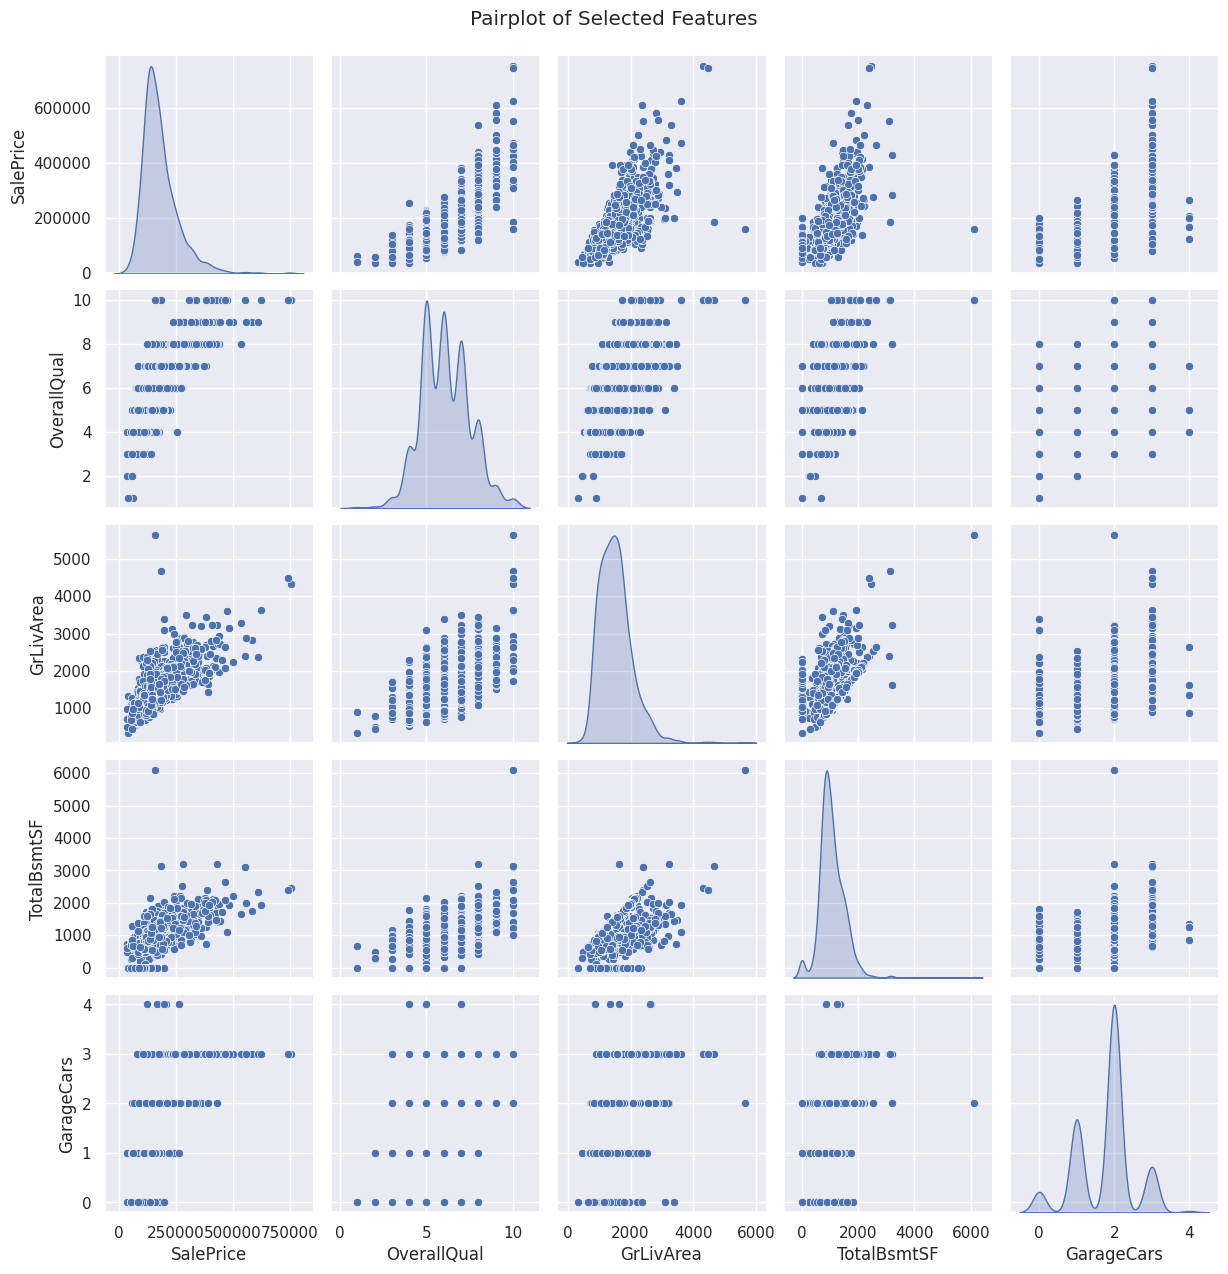

In [66]:
# Pairplot of potential features that influence Saleprice
features_to_plot = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars']
sns.pairplot(train_df[features_to_plot], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust title position
plt.show()

## Data Preprocessing and Feature Engineering

**Preparing the Data**

In [67]:
le = preprocessing.LabelEncoder()

df_encode = train_df.copy()

# Convert mixed type columns to strings
mixed_type_columns = ['MasVnrType', 'MasVnrArea', 'GarageYrBlt', 'PropertyType']
for col in mixed_type_columns:
    df_encode[col] = df_encode[col].astype(str)

# Encode all object columns and mixed type columns
columns_to_encode = df_encode.select_dtypes(include=['object']).columns.tolist() + mixed_type_columns
for col in columns_to_encode:
    df_encode[col] = le.fit_transform(df_encode[col].astype(str))

# Check for any remaining non-numeric columns
remaining_non_numeric = df_encode.select_dtypes(exclude=[np.number]).columns
print("Remaining non-numeric columns:", remaining_non_numeric)

Remaining non-numeric columns: Index([], dtype='object')


In [68]:
df_encode.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyType
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,8,4,208500,5
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,8,4,181500,1
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,8,4,223500,5
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,8,0,140000,8
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,8,4,250000,5


In [70]:
# Selecting numeric columns
numeric_columns = train_df.select_dtypes(include=[np.number]).columns

# List of features to keep
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
                    'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
                    'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea']

# Dataframe with only the selected features
df_selected = df_encode[features]

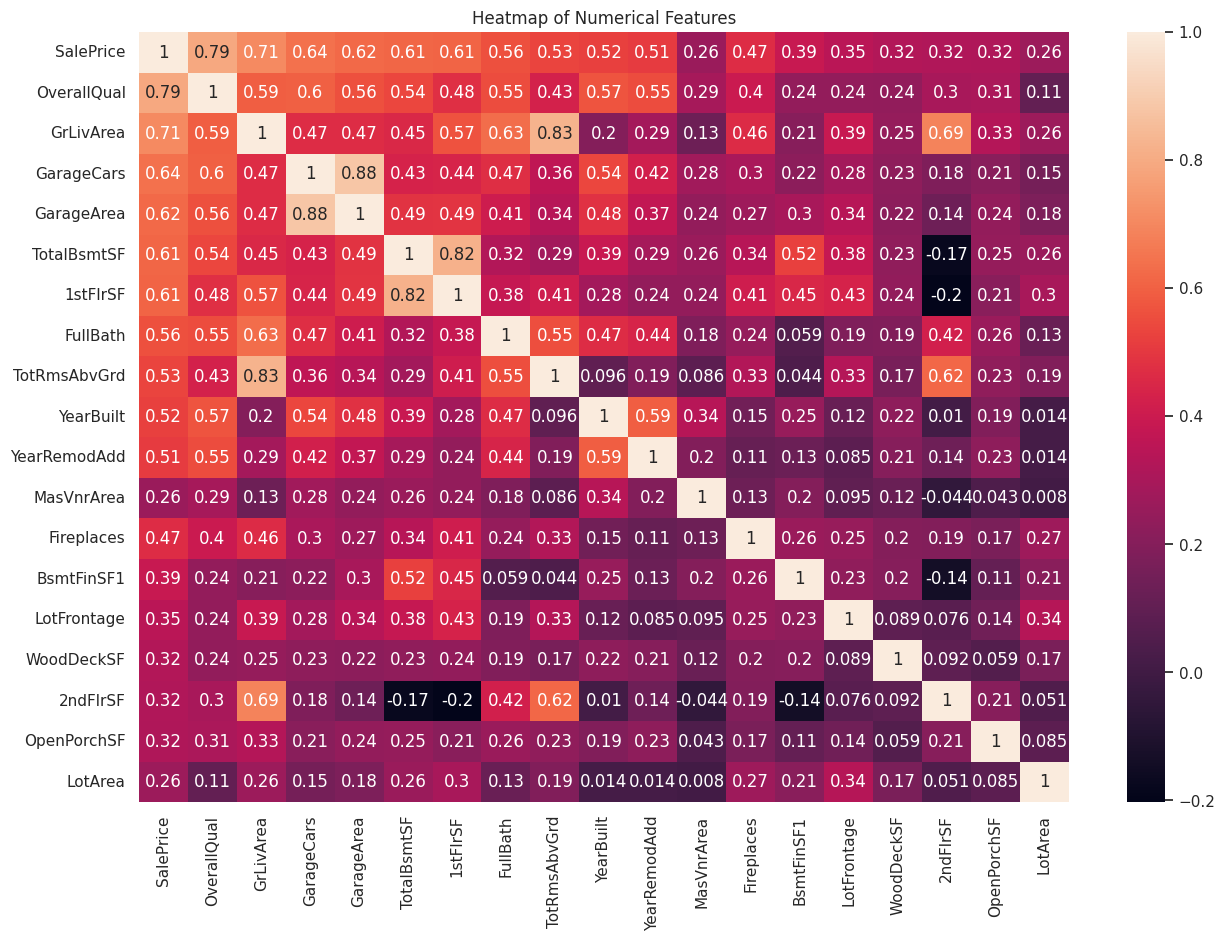

In [73]:
# heatmap of all numeric features in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df_selected.corr(),annot=True)
plt.title('Heatmap of Numerical Features')
plt.show()

**Preparing Test Data**

In [77]:
# Display first few rows to get to know the dataset
# Getting to know the data
print(f"Test Data Shape: {test_df.shape}")
print()

test_df.info()
print()

test_df.head()

Test Data Shape: (1459, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [89]:
# Encode test data
df_encode_test = test_df.copy()
for col in columns_to_encode:
    if col in df_encode_test.columns:
        df_encode_test[col] = le.fit_transform(df_encode_test[col].astype(str))

# Verify with dispaying first observations
df_encode_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,NaN,3,3,0,...,120,0,NaN,MnPrv,NaN,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,NaN,0,3,0,...,0,0,NaN,NaN,Gar2,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,NaN,0,3,0,...,0,0,NaN,MnPrv,NaN,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,NaN,0,3,0,...,0,0,NaN,NaN,NaN,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,NaN,0,1,0,...,144,0,NaN,NaN,NaN,0,1,2010,8,4


In [80]:
# Prepare training and test data
X_train = df_encode.drop(['SalePrice'], axis=1).values
y_train = df_encode['SalePrice'].values

X_test = df_encode_test.drop(['Id'], axis=1).values
X_test = df_encode_test.values

print(X_train.shape, X_test.shape)

(1460, 76) (1459, 80)


In [90]:
X_train = pd.DataFrame(df_encode, columns=train_df.drop(['SalePrice','PropertyType'], axis=1).columns)
X_test = pd.DataFrame(df_encode_test, columns=test_df.columns)

# Compare feature names in X_train and X_test
print("Training features:", df_encode.columns.tolist())
print("Testing features:", df_encode_test.columns.tolist())

# Identify differences
print("Features in test but not in train:", set(X_test.columns) - set(X_train.columns))
print("Features in train but not in test:", set(X_train.columns) - set(X_test.columns))
print(X_train.shape, X_test.shape)

Training features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Mis

In [91]:
# Drop extra features in the test set
X_test_aligned = X_test.drop(columns=['Id', 'Alley', 'MiscFeature', 'Fence', 'PoolQC'], errors='ignore')

# Ensure column order matches
X_test_aligned = X_test_aligned[X_train.columns]

print("Aligned Test Features:", X_test_aligned.columns.tolist())
print(X_train.shape, X_test_aligned.shape)

Aligned Test Features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 

**Training my models for prediction**

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# or
sc = StandardScaler()
sc.fit(X_train)  # Fit the scaler on the training data
X_train=sc.transform(X_train)
X_test=sc.transform(X_test_aligned)

In [ ]:
# Splitting the data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled,y_train, test_size=0.3, random_state=2)
print(X.shape, X_train_scaled.shape, X_test.shape)

In [103]:
# Fit Simple Linear Regression Model
linreg = LinearRegression()

# Train the model
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [108]:
# Ridge regression Model
ridgreg = Ridge()

# Train the model
ridgreg.fit(X_train_scaled, y_train)

Ridge()

In [117]:
# Lasso Model
lassoreg = Lasso()

# Train the model
lassoreg.fit(X_train_scaled, y_train)

Lasso()

In [111]:
# Random Forest Regression
ranforeg = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=125, min_samples_leaf=125, max_samples=0.9, max_leaf_nodes=150, max_features=5, max_depth=35)

# Train the model
ranforeg.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=35, max_features=5, max_leaf_nodes=150,
                      max_samples=0.9, min_samples_leaf=125, n_estimators=125,
                      n_jobs=-1, random_state=42)

In [119]:
from sklearn.linear_model import ElasticNet

# Elastic Net Model
enetreg = ElasticNet()

# Train the model
enetreg.fit(X_train_scaled, y_train)

ElasticNet()

In [112]:
# XGBoost model
xgbreg = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Train the model
xgbreg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

**Make predictions**

In [123]:
# Make predictions on the test set
test_predictions = model.predict(X_test_aligned)

**Evaluating Performance**

In [124]:
# To evaluate accuracy for predictions on the training dataset
def evaluation_models(model, model_name):
    print(f"Metrics for {model_name}:")
    print(f"R² Score Error: {model.score(X_train_scaled, y_train):.4f}")
    print(f"Mean Absolute Error: ${mean_absolute_error(y_train, model.predict(X_train_scaled)):.4f}")
    print()

models = {
    "Linear Regression": linreg,
    "Ridge Regression": ridgreg,
    "Lasso Regression": lassoreg,
    "Elastic Net Regression": enetreg,
    "Random Forest": ranforeg,
    "XGBoost": xgbreg
}

for name, model in models.items():
    evaluation_models(model, name)

Metrics for Linear Regression:
R² Score Error: 0.8454
Mean Absolute Error: $18956.6095

Metrics for Ridge Regression:
R² Score Error: 0.8455
Mean Absolute Error: $18958.2599

Metrics for Lasso Regression:
R² Score Error: 0.8455
Mean Absolute Error: $18959.8458

Metrics for Elastic Net Regression:
R² Score Error: 0.8323
Mean Absolute Error: $18976.2122

Metrics for Random Forest:
R² Score Error: 0.5805
Mean Absolute Error: $31917.1954

Metrics for XGBoost:
R² Score Error: 0.9996
Mean Absolute Error: $1058.8714



**Interpretation**     
Linear Regression: Extremely poor performance, likely due to overfitting or numerical instability. The MAE is excessively large, suggesting wild inaccuracies.

Ridge Regression: Slightly better but still poor. High MAE indicates predictions are still inaccurate.

Random Forest: Moderate performance, explaining 58.69% of the variance. MAE is reasonable but still has significant errors.

XGBoost: Best performance with a high R² (0.9998) and low MAE ($819.71), but near-perfect training results suggest potential overfitting.mance estimates.

## Feature Engineering

**Cross Validation**

In [125]:
# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)

    print(f"{name} Cross-Validation Results:")
    print(f"Mean RMSE: ${rmse_scores.mean():.2f}")
    print(f"Standard Deviation: ${rmse_scores.std():.2f}")
    print()

Linear Regression Cross-Validation Results:
Mean RMSE: $36300.69
Standard Deviation: $11945.89

Ridge Regression Cross-Validation Results:
Mean RMSE: $36281.31
Standard Deviation: $11914.60



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.464e+10, tolerance: 6.967e+08



Lasso Regression Cross-Validation Results:
Mean RMSE: $36298.51
Standard Deviation: $11944.56



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.479e+11, tolerance: 6.967e+08

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.722e+11, tolerance: 7.213e+08

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.601e+11, tolerance: 7.595e+08

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

Elastic Net Regression Cross-Validation Results:
Mean RMSE: $35894.00
Standard Deviation: $11608.56

Random Forest Cross-Validation Results:
Mean RMSE: $54823.93
Standard Deviation: $5240.20

XGBoost Cross-Validation Results:
Mean RMSE: $30749.68
Standard Deviation: $7114.28



**Interpretation**   
Linear Regression: High variability indicating inconsistent performance.

Ridge Regression: Similar to Linear Regression with slightly lower variability.

Random Forest: Higher mean RMSE but with lower variability, suggesting more stable but less accurate predictions.

XGBoost: Best performance with a moderate variability indicating strong accuracy with some fluctuation.

Conclusion: XGBoost performs the best in terms of accuracy and consistency.

**Hyperparameter Tuning**

*Broad Model Exploration*

In [126]:
def find_best_model_using_gridsearchcv(X, y):
    # Define models and hyperparameters
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10, 100]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5]
            }
        },
        'xgboost': {
            'model': XGBRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5, 7]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Loop through algorithms and run GridSearchCV
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Run the broad exploration
results = find_best_model_using_gridsearchcv(X_train, y_train)
print("Model Comparison Results:")
print(results)

# Identify the best-performing model
best_model = results.loc[results['best_score'].idxmax()]
print(f"Best Model: {best_model['model']}")
print(f"Best Score (MSE): {-best_model['best_score']:.2f}")
print(f"Best Parameters: {best_model['best_params']}")

KeyboardInterrupt: 

**Insights from Broad Model Comparison**  
XGBoost performed best, with the lowest mean squared error (MSE). Its optimal parameters were:
Learning rat of: 0.,
Max deh ofh: and 3
Number of estimat ofrs: .
200
Random Forest was the second-best model, with an MSE of 1,048,163,000,
000.
The linear models (Linear Regression, Ridge, and Lasso) performed poorly compared to the tree-based models, with MSEs over 2 billion.
The Decision Tree model fell between the linear models and ensemble methods in perform
ance.
Overall, the gradient boosting approach of XGBoost seems most effective for this dataset, likely due to its ability to capture complex non-linear relationships between features and house prices.

In [ ]:
best_model = results.loc[results['best_score'].idxmax()]
print(f"Best model: {best_model['model']}")
print(f"Best score: {best_model['best_score']}")
print(f"Best parameters: {best_model['best_params']}")

Best model: xgboost
Best score: -751474682.0163386
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


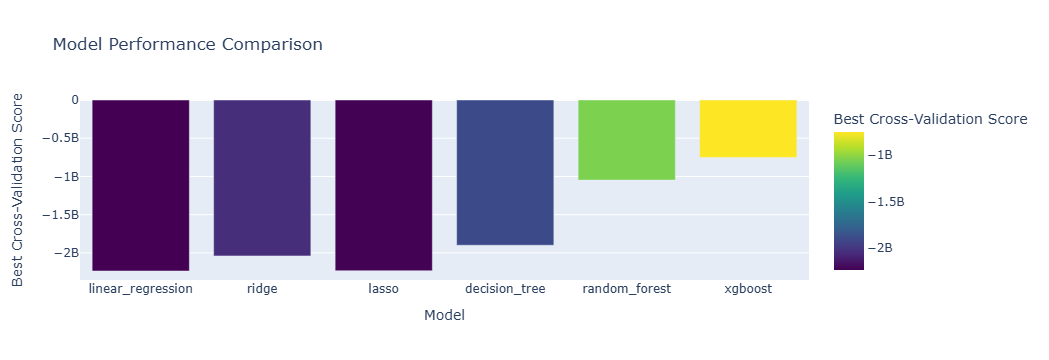

In [ ]:
# Create a bar plot comparing model performance
fig = px.bar(
    results,
    x='model',
    y='best_score',
    title='Model Performance Comparison',
    labels={'model': 'Model', 'best_score': 'Best Cross-Validation Score'},
    color='best_score',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Show the figure
fig.show()

## Testing the data

Lastly I will do the prediction using the best two models

**Prediction on the Test Data**

In [ ]:
# Predict SalePrice using the best model
y_pred = xgbreg.predict(X_test_aligned)  # Replace xgbreg with your best model variable

# Display some predictions
print("Predicted Sale Prices (first 10):", best_model_predictions[:10])


Predicted Sale Prices (first 10): [127139.53 160015.31 185309.28 193141.95 187512.28 171793.83 180742.45
 170361.66 185283.95 126490.97]


**Evaluation Metrics**

In [127]:
# DataFrame for submission
if 'Id' in X_test.columns:
    submission = pd.DataFrame({
        'Id': X_test['Id'],
        'SalePrice': best_model_predictions
    })
else:
    submission = pd.DataFrame({
        'SalePrice': best_model_predictions
    })

# Save to CSV
submission.to_csv('house_price_predictions.csv', index=False)
print("Predictions saved to 'house_price_predictions.csv'.")


NameError: name 'best_model_predictions' is not defined

In [ ]:
print("Summary of Predicted Sale Prices:")
print(submission['SalePrice'].describe())

Summary of Predicted Sale Prices:
count      1459.000000
mean     178398.000000
std       77240.812500
min       40350.679688
25%      128289.082031
50%      159089.734375
75%      208932.554688
max      708729.125000
Name: SalePrice, dtype: float64


In [ ]:
# actual vs predicted
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
# plot residuals
resid = ypred - ytest.saleprice

plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.scatter(ytest.saleprice, resid)
plt.axhline(0, linestyle='-', color='r')
plt.title('residual distribution plot',fontsize=14)
plt.xlabel('actual values',fontsize=12)
plt.ylabel('residuals',fontsize=12)
plt.plot([], [], ' ', label="model: elastic net")
plt.legend()
plt.tight_layout()

In [ ]:
# plot ypred vs ytrue
fig, ax = plt.subplots(figsize=(6.0, 6.0))
ax.scatter(ytest.saleprice, ypred)
ax.set_title('predicted values distribution plot',fontsize=14)
ax.set_xlabel('actual values',fontsize=12)
ax.set_ylabel('predicted values',fontsize=12)
ax.set_xlim(20,45)
ax.set_ylim(20,45)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c="r")
plt.plot([], [], ' ', label="model: elastic net")
plt.legend()
plt.tight_layout()